# 模型结果展示

# 引入库

In [4]:
import predict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy
from utils import show_t
from constants import ASIA_PARM

# 不同模型在china_with_normal上比较
## 1. 载入模型

In [5]:

# china_with_normal_tGAN_4模型
sophine_infer = predict.Infer(use_cuda=1)
sophine_infer.load_model('temp/sophine_pre12.pt')

## 2. 查看各个模型的指标

In [6]:
print('start')
metrics = sophine_infer.check_accuracy()
print('sophine test ade is %f' % metrics['ade'])
print('sophine test fde is %f' % metrics['fde'])
print('end')

start
sophine test ade is 0.009719
sophine test fde is 0.020376
end


In [7]:
print('start')
metrics = sophine_infer.get_metrics()
print('sophine test ade is %f' % metrics['ade'])
print('sophine test fde is %f' % metrics['fde'])
print('end')

start
sophine test ade is 0.014872
sophine test fde is 0.034721
end


## 3. 实际效果的测试

In [8]:
# 获取一条数据
obs_traj, pred_traj_gt, obs_traj_rel, pred_traj_gt_rel = sophine_infer.get_one_data()

In [9]:
predictions = []
sophine_pred, sophine_ade, sophine_fde = sophine_infer.predict(obs_traj, pred_traj_gt, obs_traj_rel)
predictions.append([sophine_pred, sophine_ade, sophine_fde, 'sophine'])

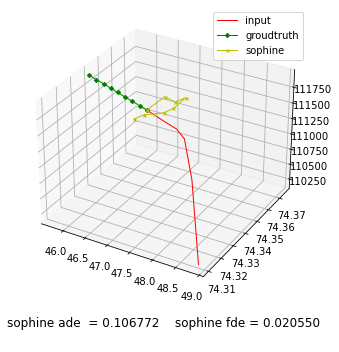

In [10]:
obs_traj = obs_traj.cpu().detach().numpy()

pred_traj_gt = pred_traj_gt.cpu().detach().numpy()
show_t(obs_traj[:, :, 0, :], pred_traj_gt, predictions, ASIA_PARM)



